In [1]:
# !pip install --upgrade --no-cache-dir gdown

In [2]:
# !gdown https://drive.google.com/uc?id=12FIGFL_-WnKTTOo8AC_eh3O1VNzvDeQP

In [3]:
# !unzip MaskDatasets.zip

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
class_name = {'mask':0,'no_mask':1}

In [6]:
import os
import PIL


def mask_datasets_path(root_dir,mode):
  X,y = [],[]
  mask_fname = os.listdir(os.path.join(root_dir,mode,'Mask'))
  no_mask_fname = os.listdir(os.path.join(root_dir,mode,'NoMask'))
  mask_dir = os.path.join(root_dir,mode,'Mask')
  no_mask_dir = os.path.join(root_dir,mode,'NoMask')
  
  for i in range(len(mask_fname)) :
    f = os.path.join(mask_dir,mask_fname[i])
    image = PIL.Image.open(f)
    image = image.resize((224,224))
    arr = np.array(image)
    X.append(arr)
    y.append(class_name['mask'])

  for i in range(len(no_mask_fname)) :
    f = os.path.join(no_mask_dir,no_mask_fname[i])
    image = PIL.Image.open(f)
    image = image.resize((224,224))
    arr = np.array(image)
    X.append(arr)
    y.append(class_name['no_mask'])
  return np.array(X),np.array(y)

if __name__ == "__main__" :
  path = '/content/MaskDatasets'
  X_train,y_train = mask_datasets_path(path,'Train')
  X_val,y_val = mask_datasets_path(path,'Validation')
  X_test,y_test = mask_datasets_path(path,'Test')
  

In [7]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

### 모델

In [8]:
# 정규화

X_train = X_train.astype('float32')/225.
X_val = X_val.astype('float32')/225.
X_test = X_test.astype('float32')/225.

In [9]:
model = keras.Sequential([
    # chanel 수 , receptive field 수 , input_shape
    layers.Conv2D(16,3,input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),
    # 30프로 드롭아웃 시키겠다는 소리이다.
    layers.Dropout(0.3),

    layers.Conv2D(64,3),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3),

    layers.Conv2D(128,3),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc']
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 16)     64        
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      9

In [11]:
from tensorflow.keras import callbacks

ckpt_path = 'mask_check.ckpt'
ckpt_callback = callbacks.ModelCheckpoint(
    ckpt_path,
    monitor='val_loss',
    save_weights_only = True,
    save_best_only = True,
    verbose = 1,
)

In [18]:
EPOCHS = 100
BATCH_SIZE = 32

log = model.fit(X_train,y_train,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                callbacks=[ckpt_callback],
                validation_data=(X_val,y_val),
                verbose=1)

Epoch 1/100
19/19 [==============================] - ETA: 0s - loss: 0.0100 - acc: 1.0000
Epoch 1: val_loss did not improve from 0.46825
19/19 [==============================] - 1s 33ms/step - loss: 0.0100 - acc: 1.0000 - val_loss: 0.7078 - val_acc: 0.8333
Epoch 2/100
19/19 [==============================] - ETA: 0s - loss: 0.0109 - acc: 0.9967
Epoch 2: val_loss did not improve from 0.46825
19/19 [==============================] - 0s 26ms/step - loss: 0.0109 - acc: 0.9967 - val_loss: 0.5795 - val_acc: 0.8366
Epoch 3/100
19/19 [==============================] - ETA: 0s - loss: 0.0085 - acc: 1.0000
Epoch 3: val_loss did not improve from 0.46825
19/19 [==============================] - 0s 26ms/step - loss: 0.0085 - acc: 1.0000 - val_loss: 1.0219 - val_acc: 0.7582
Epoch 4/100
19/19 [==============================] - ETA: 0s - loss: 0.0054 - acc: 1.0000
Epoch 4: val_loss did not improve from 0.46825
19/19 [==============================] - 0s 26ms/step - loss: 0.0054 - acc: 1.0000 - val_los

In [21]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

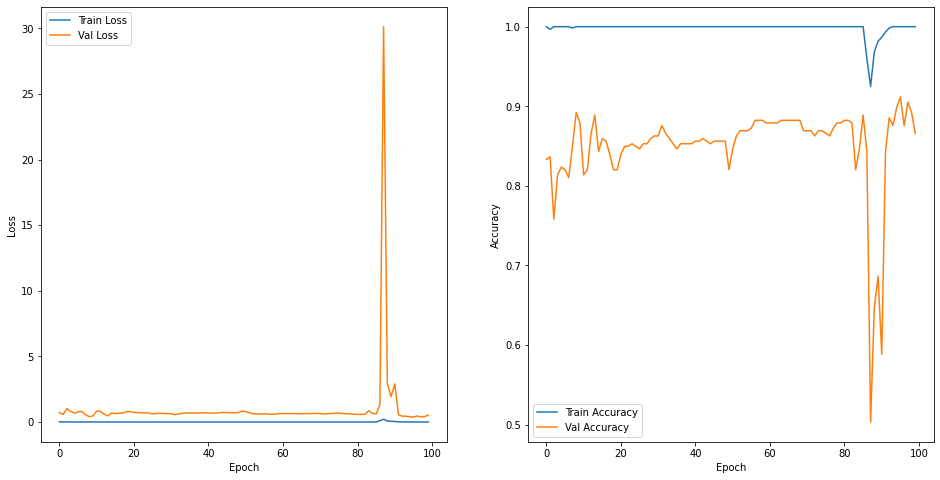

In [22]:
plot_history(log)

In [23]:
model.evaluate(X_train,y_train)

19/19 [==============================] - 0s 9ms/step - loss: 0.0095 - acc: 0.9983


[0.00945885106921196, 0.9983333349227905]

In [24]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 8ms/step - loss: 0.2656 - acc: 0.9200


[0.26556533575057983, 0.9200000166893005]